# TMA02

### Don't really know what this does yet tbh

Boilerplate

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Functions

In [2]:
#helper functions to do deg/rad conversions

def deg_to_rad(deg):
    return deg*(2*np.pi/360)

def rad_to_deg(rad):
    return (rad*360)/(2*np.pi)

Implementation of the Compton function

$$E_{\text{out}} = \frac{E_{\text{in}}}{1 + \dfrac{E_{\text{in}}}{m_{\text{e}} c^{2}} \left[1 - \cos(\theta) \right]}$$

Note that $m_{e}c^{2}=511.0 \text{ keV}$


In [3]:
#implements the Compton forumla as given. Expects angle in radians
def compton(e_in,theta):
    '''
    Returns something

            Parameters:
                    e_in (float): The input energy in keV
                    theta_deg (float): The scattering angle in radians

            Returns:
                    e_out (float): Result of the Compton formula for the given parameters in keV
    '''
    denom=1+(e_in/511.0*(1-np.cos(theta)))
    e_out=e_in/denom
    return e_out


### Testing

A worksheet calculating the expected output for some given inputs was created in excel.  This was compared with the output of the python function.  No idea if this is how to go about it though.


In [4]:
df = pd.read_csv('test.csv', usecols=['Theta', 'E_in','e_out'])[['Theta', 'E_in','e_out']] 

tuples = list(df.itertuples(index=False, name=None))

for theta, e_in, e_exp in tuples:        
     print(f'Theta is {theta:.0f}. e_i is {e_in}. Calculated value is {compton(e_in,deg_to_rad(theta)):.4f}. \
Expected value is {e_exp:.4f} ')


Theta is 0. e_i is 30. Calculated value is 30.0000. Expected value is 30.0000 
Theta is 0. e_i is 40. Calculated value is 40.0000. Expected value is 40.0000 
Theta is 0. e_i is 50. Calculated value is 50.0000. Expected value is 50.0000 
Theta is 0. e_i is 60. Calculated value is 60.0000. Expected value is 60.0000 
Theta is 0. e_i is 70. Calculated value is 70.0000. Expected value is 70.0000 
Theta is 0. e_i is 80. Calculated value is 80.0000. Expected value is 80.0000 
Theta is 0. e_i is 90. Calculated value is 90.0000. Expected value is 90.0000 
Theta is 90. e_i is 30. Calculated value is 28.3364. Expected value is 28.3364 
Theta is 90. e_i is 40. Calculated value is 37.0962. Expected value is 37.0962 
Theta is 90. e_i is 50. Calculated value is 45.5437. Expected value is 45.5437 
Theta is 90. e_i is 60. Calculated value is 53.6953. Expected value is 53.6953 
Theta is 90. e_i is 70. Calculated value is 61.5663. Expected value is 61.5663 
Theta is 90. e_i is 80. Calculated value is 69.

In [8]:
print(type(tuples))
print(type(df))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


### Building lists of inputs and outputs to use for doing the graph

We determine the ratio $E_{\text{out }}/E_{\text{in}}$ using a list comprehension to make a list that can easly be interated through to draw the required graph.  It's possibly a little complicated and might have been better to use nested for-each loops but it works. 

In [5]:
#the required angles converted to radians
angles =deg_to_rad(np.array([30,60,90,150]))

# builds a range of input energies
e_in_range=np.array(np.arange(17.4,500, 1))

#builds a list of the form [[angle1,[output1,output2.,..],[angle2,[output1,output2.,..],...] 
#for each angle of interest and for the input range above
e_list=[[rad_to_deg(angle),[compton(e_in, angle)/e_in for e_in in e_in_range]] for angle in angles]

### Drawing the graph


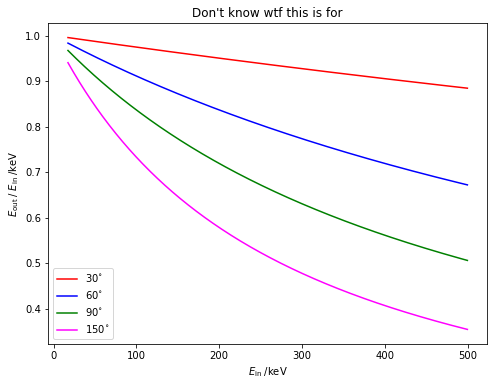

In [6]:
plt.rcParams['figure.figsize'] = [20/2.54,15/2.54] #sets graph size

fig,ax = plt.subplots()  # Create a figure and axes.
ax.set_prop_cycle(color=['red', 'blue', 'green','magenta']) #set a colour cycle for teh plots

#iterates through the result array plotting a line for each angle. 
for angle,ratios in e_list:
    ax.plot(e_in_range,ratios, label=str(int(round(angle,0)))+'$^{\circ}$')  
    
plt.title("Don't know wtf this is for")
plt.xlabel(r'$E_{\mathrm{in}}\;\mathrm{/keV}$')
plt.ylabel(r'$E_{\mathrm{out}}\;/\;E_{\mathrm{in}}\;\mathrm{/keV}$')
plt.legend()
plt.savefig('graph.png')